In [0]:
from google.colab import files
uploaded=files.upload()

Saving BrainTumorData.csv to BrainTumorData (1).csv


In [0]:
import pandas as pd
pd.set_option('display.width',1000)
pd.set_option('display.max_column',40)
pd.set_option('precision',2)

In [0]:
import io
data = pd.read_csv(
    io.BytesIO(uploaded['BrainTumorData.csv']),
    index_col=False)
print(data)

In [0]:
print(data.head(5))




In [0]:




print("data.shape=", data.shape,"\n\n")


print(data.describe())



In [0]:
data['diagnosis']=data['diagnosis'].apply(
            lambda x:'1' if x== 'M' else'0')

data = data.set_index('id')

del data['Unnamed: 32']

print("After Deletion of 'Unnamed: 32' column\n",data)


In [0]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [0]:
import matplotlib.pyplot as plt
from matplotlib import cm as cm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


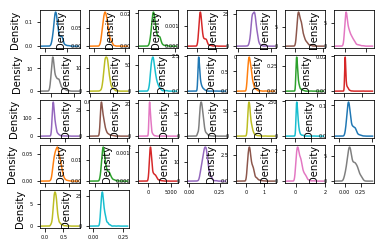

In [0]:
data.plot(kind='density', subplots=True,
         layout=(5,7), sharex=False, legend=False,
         fontsize=5)

plt.show()

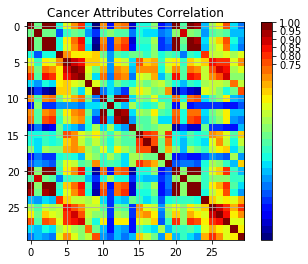

In [0]:
fig= plt.figure()
ax1= fig.add_subplot(111)
cmap= cm.get_cmap('jet',30)
cax= ax1.imshow(data.corr(),
               interpolation="none",cmap=cmap)
ax1.grid(True)
plt.title('Cancer Attributes Correlation')


fig.colorbar(cax,ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [0]:
Y=data['diagnosis'].values
X=data.drop('diagnosis',axis=1).valuse



In [0]:
import warning
warnings.filterwarnings(action="ignore")

  from sklearn import linear_model

model= linear_model.LogisticRegression()

X_train, X_test, Y_train, Y_test =
train_test_split (X, Y, test_size= 0.33)

model.fit(X_train, Y_train)

#predictedY=model.predict(X_test)

result=model.score(X_test, Y_test)

print("Accuracy=", (result * 100), "%")





num_folds = 10
kfold = KFold(n_splits=num_folds)
results = cross_val_score(model, X, Y, cv=kfold)
print("KFold Accuracy=", results.mean())